In [ ]:
#SETUP
!pip install eli5
!pip install pdpbox
!pip install matplotlib
!apt-get -qq install -y graphviz && pip install pydot
!pip install graphviz
!pip install seaborn
!pip install shap
!pip install lime

!mkdir data
!wget https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/data/FIFA%202018%20Statistics.csv 
!wget https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/data/day.csv
!wget https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/data/risk_factors_cervical_cancer.csv
!wget https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.csv
!mv *.csv data/

     |████████████████████████████████| 106 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 40.0 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=bcedbe33335809891250fb97e7077aa15a2361750685f05dfb6df2e5243d7eee
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 564 kB 13.7 MB/s 
     |████████████████████████████████| 275 kB 14.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=72dfa0af95aba426f1803eaa7716dcb8d36b2f342bfd07b81e0935de35aa9047
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
--2021-12-13 11:05:13--  https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/data/FIFA%202018%20Statistics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12428 (12K) [text/plain]
Saving to: ‘FIFA 2018 Statistics.csv’

FIFA 2018 Statistic 100%[===================>]  12.14K  --.-KB/s    in 0s      

2021-12-13 11:05:13 (88.1 MB/

# Explainable AI

## What is the problem?

![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/programing-ml.png)
![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/iml-ml.png)

## Why do we need Explainable AI?

![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/explain.png)

## Agnostic-model

![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/black-box.png)
![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/agnostic-black-box.png)

## Permutation Importance

It is a method to evaluate how important a single feature is in a trained model and is computed as follows:

1. Train a model on a dataset.
2. Shuffle the values in a single column (e.g., the values of a single features).
3. Apply the  model both to the original data and to shuffled data.
4. Compute the feature importance as the loss of performance when the model is applied to the suffled data.

![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/perm1.png)
![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/perm2.png)


### Additional notes

* How to do permutation? 
    * half dataset swap
    * generate n*n-1 samples 

* Use training set or test set?

### Examples

We will use the [eli5](https://eli5.readthedocs.io/en/latest/) library that provide implementation for the [PermutationImportance](https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#module-eli5.sklearn.permutation_importance):

#### Man of the Match (Classification)

In [ ]:
#STEP 1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

fifa_data = pd.read_csv('data/FIFA 2018 Statistics.csv')
fifa_y = (fifa_data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
fifa_feature_names = [i for i in fifa_data.columns if fifa_data[i].dtype in [np.int64]]
fifa_X = fifa_data[fifa_feature_names]
fifa_train_X, fifa_val_X, fifa_train_y, fifa_val_y = train_test_split(fifa_X, fifa_y, random_state=1)
fifa_forest_model = RandomForestClassifier(random_state=0,n_estimators=100).fit(fifa_train_X, fifa_train_y)

In [ ]:
fifa_data.head()

Date          Team  ... Own goals  Own goal Time
0  14-06-2018        Russia  ...       NaN            NaN
1  14-06-2018  Saudi Arabia  ...       NaN            NaN
2  15-06-2018         Egypt  ...       NaN            NaN
3  15-06-2018       Uruguay  ...       NaN            NaN
4  15-06-2018       Morocco  ...       1.0           90.0

[5 rows x 27 columns]

In [ ]:
#STEP 2-4



import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(fifa_forest_model, random_state=1).fit(fifa_val_X, fifa_val_y)
print(perm.feature_importances_)
print(fifa_val_X.columns)
eli5.show_weights(perm, feature_names = fifa_val_X.columns.tolist())

[ 0.175    0.00625 -0.01875  0.       0.01875  0.0125  -0.00625 -0.00625
  0.01875  0.00625  0.0125  -0.05     0.05     0.01875  0.04375  0.
  0.      -0.00625]
Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
       'Goals in PSO'],
      dtype='object')


### Bike Sharing (Regression)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, make_scorer

bike_data = pd.read_csv('data/day.csv')
temp_data = pd.read_csv('data/bike.csv')
bike_data['temp'] = temp_data['temp']
bike_data['hum'] = temp_data['hum']
bike_data['windspeed'] = temp_data['windspeed']
bike_data.tail()

instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
726      727  2012-12-27       1   1  ...  23.458911     247        1867  2114
727      728  2012-12-28       1   1  ...  10.416557     644        2451  3095
728      729  2012-12-29       1   1  ...   8.333661     159        1182  1341
729      730  2012-12-30       1   1  ...  23.500518     364        1432  1796
730      731  2012-12-31       1   1  ...  10.374682     439        2290  2729

[5 rows x 16 columns]

R^2 = 0.6206027283182022
MAE = 1008.4926775956283


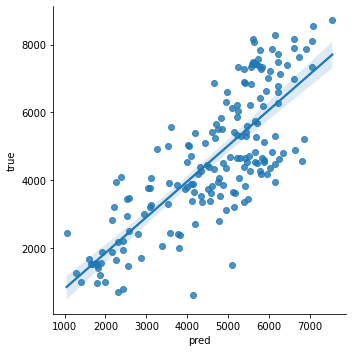

In [ ]:
bike_y = bike_data['cnt']
bike_y.head()
bike_X = bike_data.drop(['instant','dteday','yr','casual','registered','cnt'], axis=1)
bike_features = bike_X.columns
bike_train_X, bike_val_X, bike_train_y, bike_val_y = train_test_split(bike_X, bike_y, random_state=2)
bike_forest_model = RandomForestRegressor(random_state=0, n_estimators=100).fit(bike_train_X, bike_train_y)
bike_pred_y = bike_forest_model.predict(bike_val_X)
bike_pred = pd.DataFrame({'pred':bike_pred_y, 'true':bike_val_y}) 
print('R^2 = {}'.format(bike_forest_model.score(bike_val_X,bike_val_y)))
sns.lmplot('pred', 'true', data=bike_pred)
print ('MAE = {}'.format(mean_absolute_error (bike_val_y, bike_pred_y)))

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

bike_forest_perm = PermutationImportance(bike_forest_model, random_state=1).fit(bike_val_X, bike_val_y)
print(bike_val_X.columns)
print(bike_forest_perm.feature_importances_)

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
[0.06373582 0.02858633 0.0018061  0.00082477 0.00214253 0.00849796
 0.45053942 0.11832556 0.20058468 0.04366475]


In [ ]:
eli5.show_weights(bike_forest_perm, feature_names = bike_val_X.columns.tolist())

In [ ]:
bike_forest_MAE_perm = PermutationImportance(bike_forest_model, scoring=make_scorer(mean_absolute_error, greater_is_better=False), random_state=1).fit(bike_val_X, bike_val_y)
eli5.show_weights(bike_forest_MAE_perm, feature_names = bike_val_X.columns.tolist())



## Partial Dependence Plot

While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

It works as follows:

1. Train a model on data.
2. Run the model on each sample by changing only the value of target feature(s) (from a set of values in the feature range).
3. Compute and plot the model output for each value of the feature.

### Example: Man of the match (classification)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

fifa_simpletree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(fifa_train_X, fifa_train_y)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


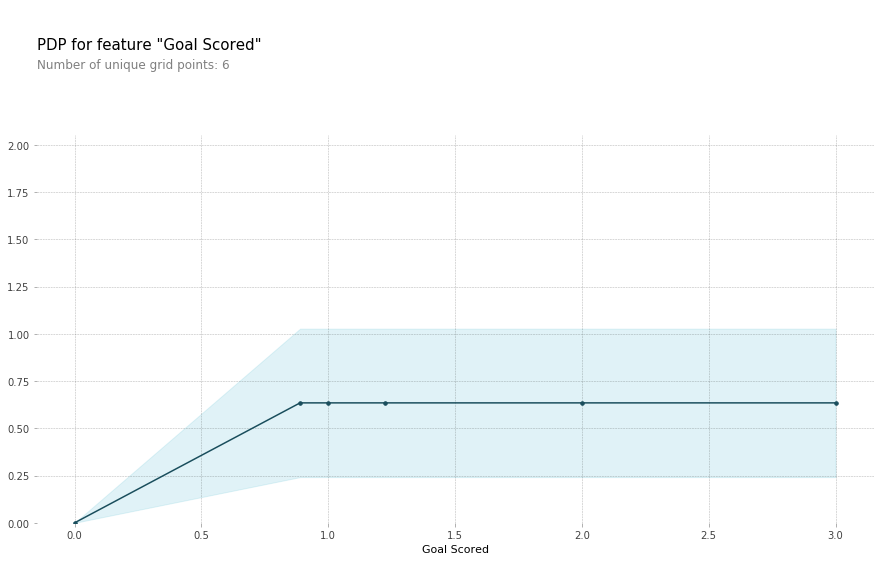

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=fifa_simpletree_model, dataset=fifa_val_X, model_features=fifa_feature_names, feature='Goal Scored')

# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

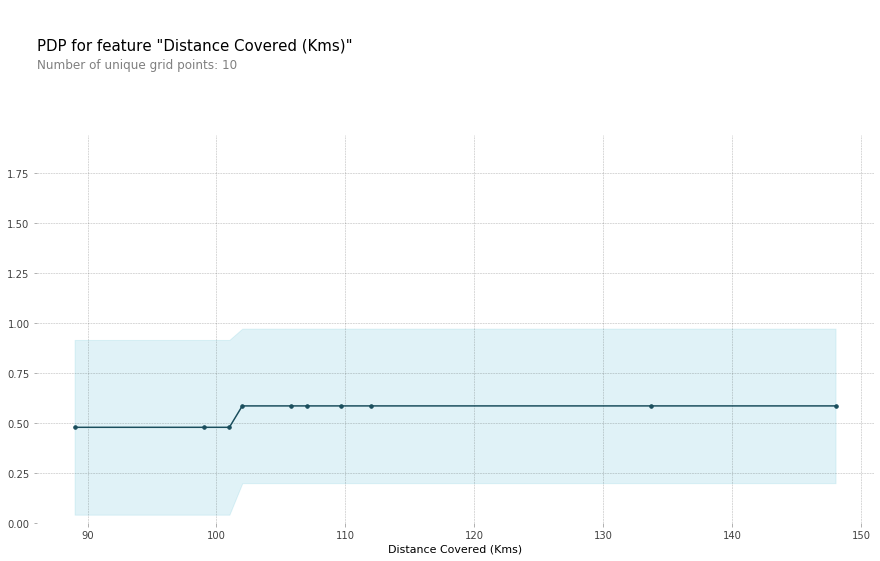

In [ ]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=fifa_simpletree_model, dataset=fifa_val_X, model_features=fifa_feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot, center=False)
plt.show()

Let's check the model to understand the plot above:

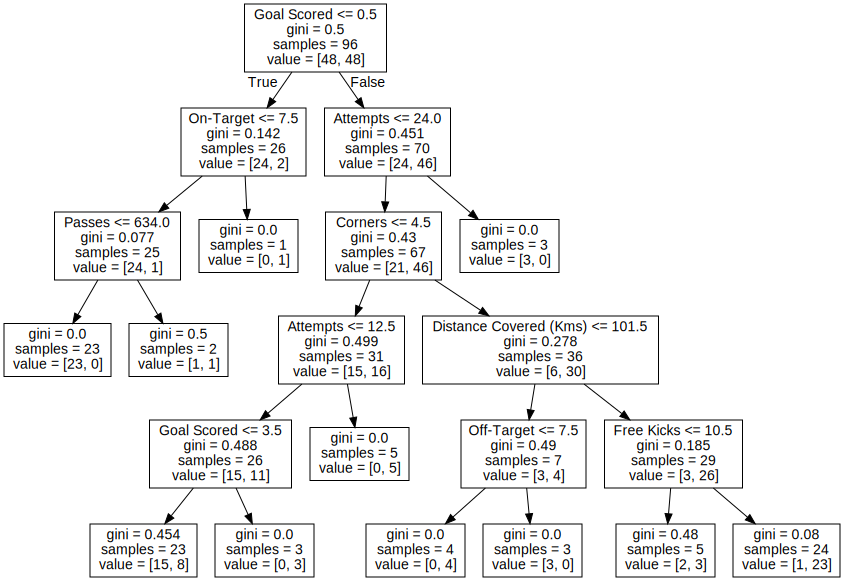

In [ ]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(fifa_simpletree_model, out_file=None, feature_names=fifa_feature_names)
graphviz.Source(tree_graph)
#print(tree_graph)

What happens if we use a more complex models:

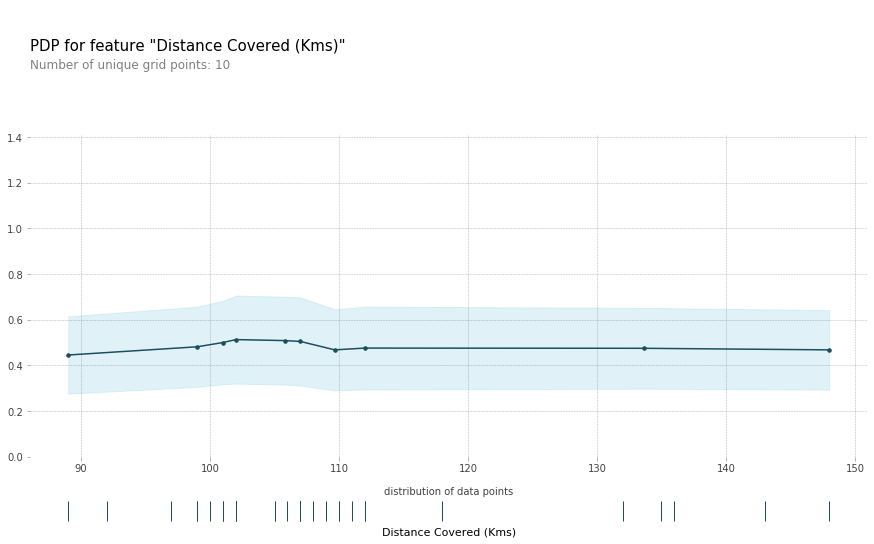

In [ ]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0, n_estimators=100).fit(fifa_train_X, fifa_train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=fifa_val_X, model_features=fifa_feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot, plot_pts_dist=True, center=False)
plt.show()

### Example: Bike Rental Regression Problem

The examples use the [PDPbox library](https://github.com/SauceCat/PDPbox)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


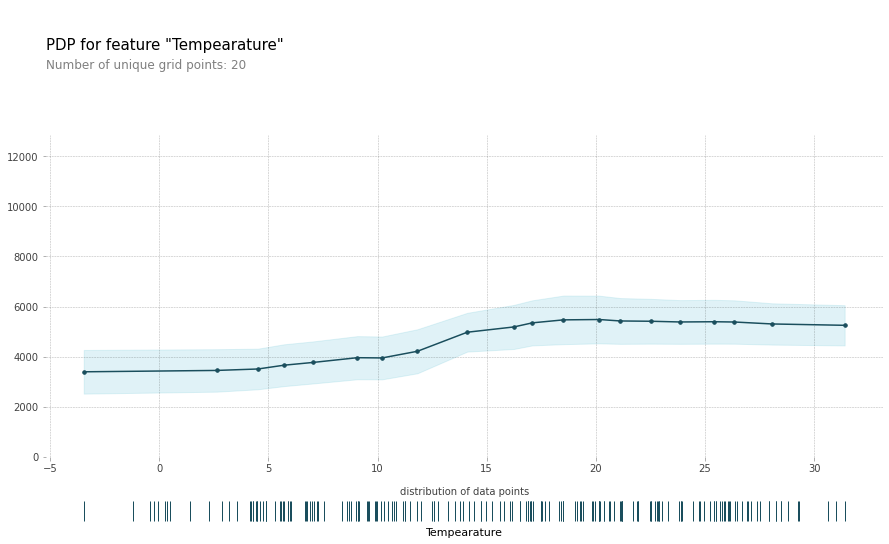

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp


# Create the data that we will plot
pdp_temp = pdp.pdp_isolate(model=bike_forest_model, dataset=bike_val_X, model_features=bike_features, feature='temp', num_grid_points=20)

# plot it
pdp.pdp_plot(pdp_temp, 'Tempearature', center=False, plot_pts_dist=True)
plt.show()

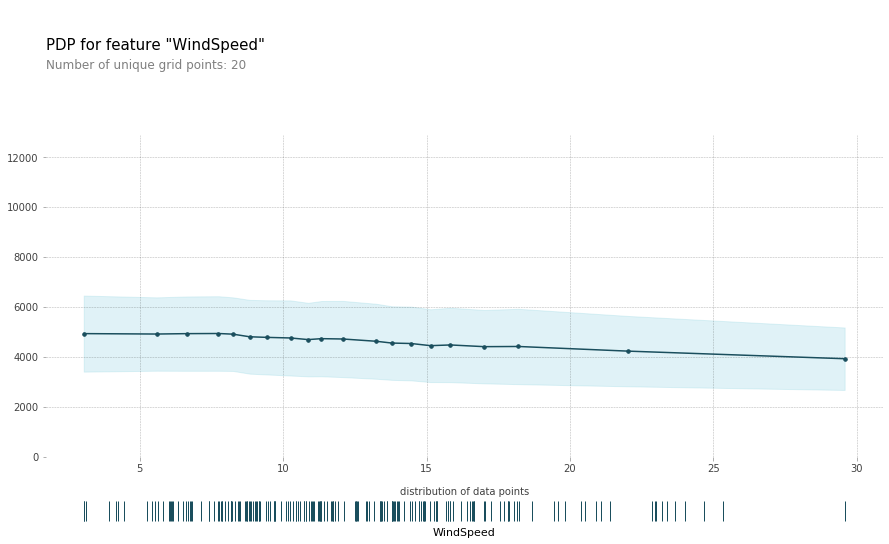

In [ ]:
# Create the data that we will plot
pdp_wind = pdp.pdp_isolate(model=bike_forest_model, dataset=bike_val_X, model_features=bike_features, feature='windspeed', num_grid_points=20)

# plot it
pdp.pdp_plot(pdp_wind, 'WindSpeed', center=False, plot_pts_dist=True)
plt.show()

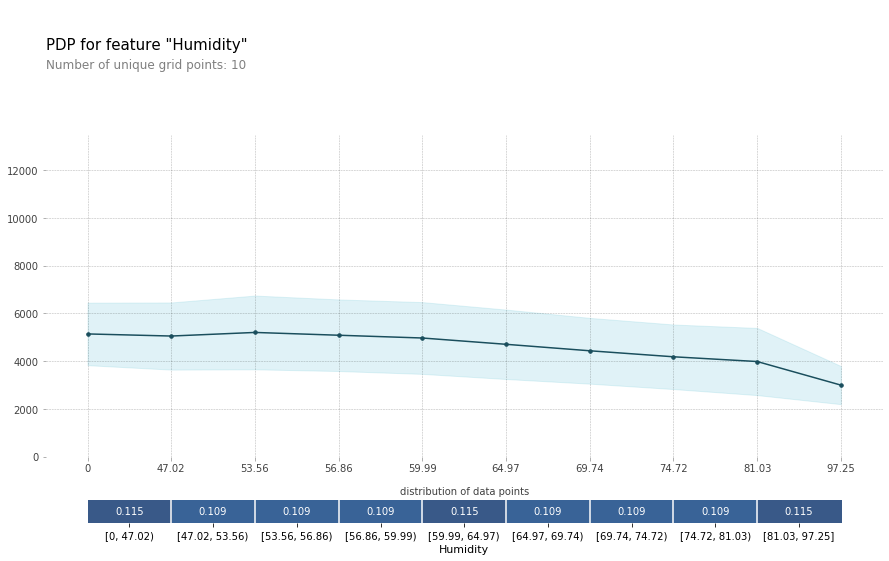

In [ ]:
# Create the data that we will plot
pdp_hum = pdp.pdp_isolate(model=bike_forest_model, dataset=bike_val_X, model_features=bike_features, feature='hum', num_grid_points=10)

# plot it
pdp.pdp_plot(pdp_hum, 'Humidity', center=False, plot_pts_dist=True, x_quantile=True)
plt.show()

<BarContainer object of 4 artists>

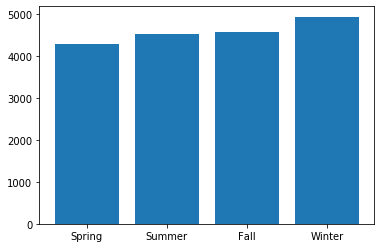

In [ ]:
# Create the data that we will plot
pdp_season = pdp.pdp_isolate(model=bike_forest_model, dataset=bike_val_X, model_features=bike_features, feature='season', num_grid_points=20)

plt.bar(['Spring','Summer','Fall','Winter'],pdp_season.pdp)


Can we look at two features at the same time:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


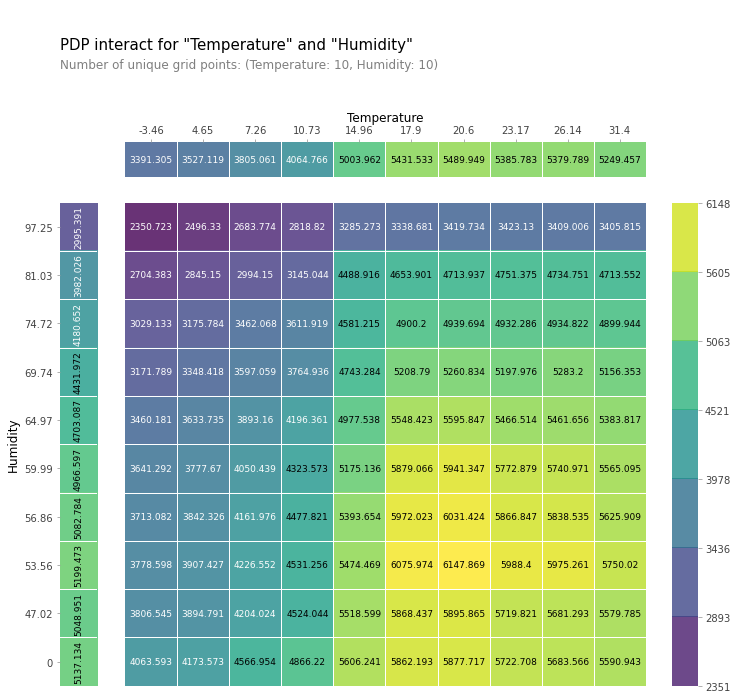

In [ ]:
inter1 = pdp.pdp_interact(model=bike_forest_model, dataset=bike_val_X, model_features=bike_features, features=['temp','hum'])
plot_params = {
     # fontsize for interact plot text
    'inter_fontsize': 9,
}

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['Temperature', 'Humidity'], 
                      plot_type='grid', plot_pdp=True, plot_params = plot_params)
plt.show()

### Limitations and remarks

* Maximum number of features analyzed is 2 
* PD plots should not omit distribution, otherwise they can be misleading
* Strong underlying assumption: features are not correlated
* Show average effect on the whole dataset --> ICE

## Individual Conditional Expectation (ICE)

* These plots are very similar to PDP plot, but they show one line per instance in the dataset, showing how the prediction change.

* They solve the "averaging" problem of PDP.

* To simplify comparison between lines, centered ICE can be plot by showing the prediction change with respect to the baseline (usually the model output for the leftmost value of the feature).

* ICE can show only one feature at once.

* Same underlying assumption of PDP: if features are correlated some area of the space are meaningless.


### Examples

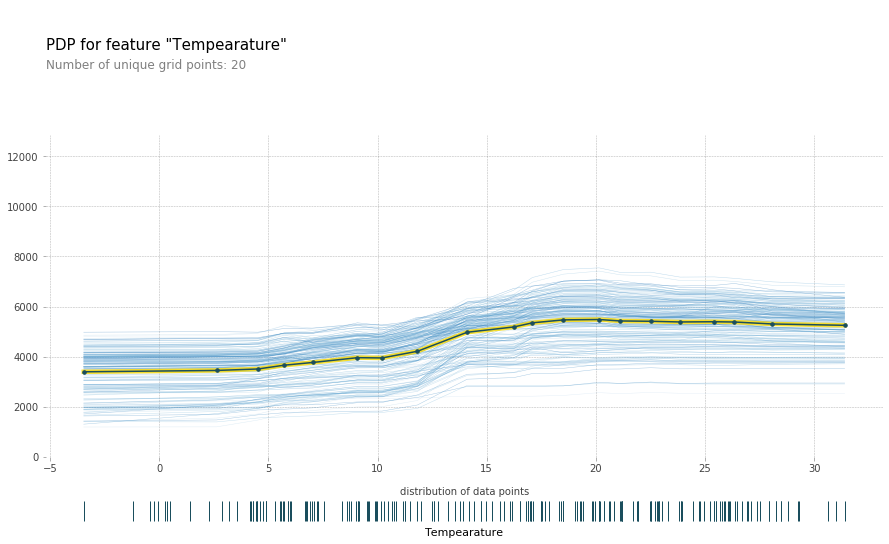

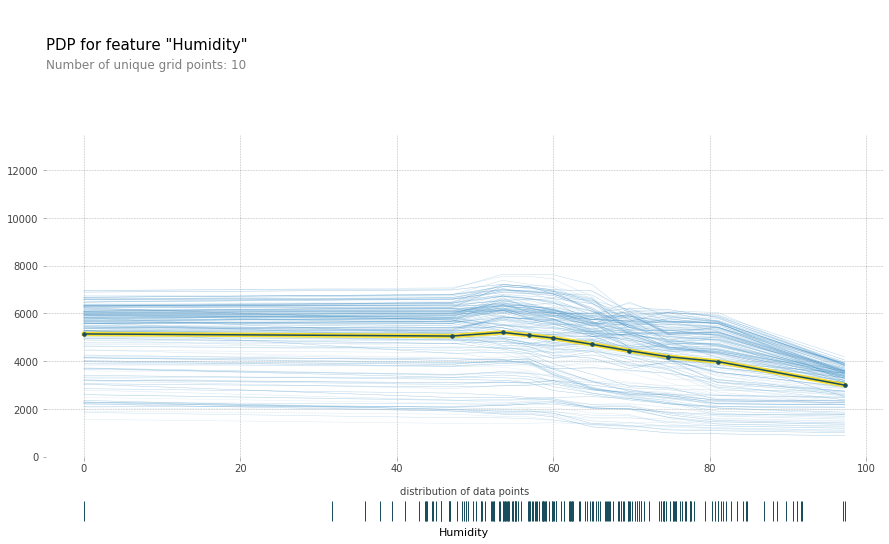

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp


# Create the data that we will plot
pdp_temp = pdp.pdp_isolate(model=bike_forest_model, dataset=bike_val_X, model_features=bike_features, feature='temp', num_grid_points=20)
pdp_hum = pdp.pdp_isolate(model=bike_forest_model, dataset=bike_val_X, model_features=bike_features, feature='hum', num_grid_points=10)


# plot it
pdp.pdp_plot(pdp_temp, 'Tempearature', center=False, plot_lines=True, plot_pts_dist=True)
pdp.pdp_plot(pdp_hum, 'Humidity', center=False, plot_lines=True, plot_pts_dist=True)
plt.show()



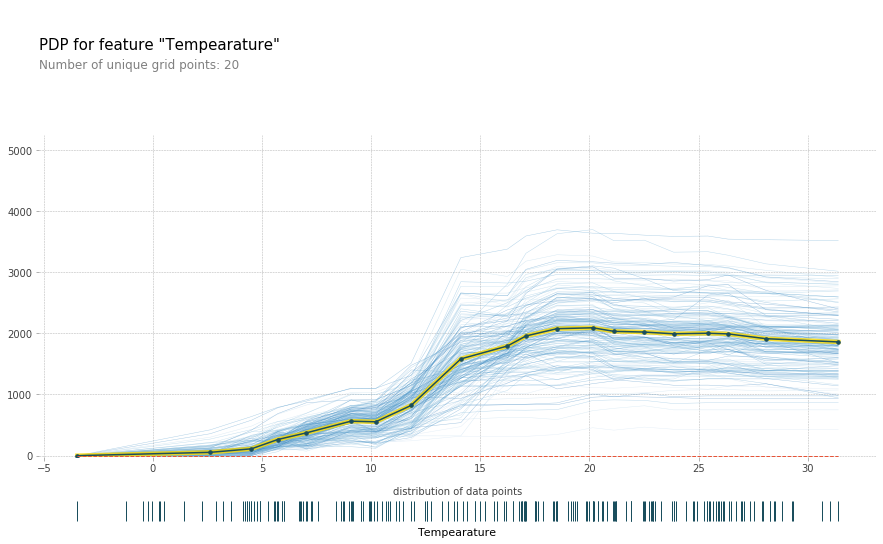

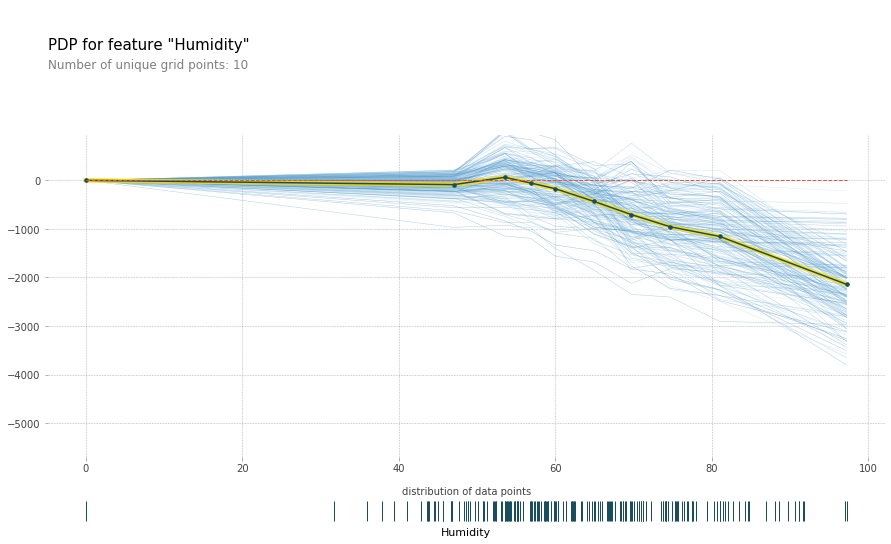

In [ ]:
#Now Centered ICE
pdp.pdp_plot(pdp_temp, 'Tempearature', center=True, plot_lines=True, plot_pts_dist=True)
pdp.pdp_plot(pdp_hum, 'Humidity', center=True, plot_lines=True, plot_pts_dist=True)
plt.show()


## SHapley Additive exPlanations (SHAP)


The underlying idea of SHAP values is being able to break down a model prediction by showing the contribution of each feature.

In particular, the goal here is compuing for each feature j, the contribution ϕ<sub>j</sub> such that 

∑ϕ<sub>i</sub> = f(x) - E<sub>X</sub>(f(x))


Let's consider first a linear model:


f(x) = β<sub>0</sub> + β<sub>1</sub>x<sub>1</sub> + ... + β<sub>n</sub>x<sub>n</sub>

We can easily compute the contribution of each feature as:

ϕ<sub>i</sub> = β<sub>i</sub>x<sub>i</sub> - β<sub>i</sub>E(X)


Can we do the same for any type of model? It would be great to have this as a model-agnostic tool. Since we usually do not have similar weights in other model types, we need a different solution.

Help comes from unexpected places: cooperative game theory. The Shapley value is a solution for computing feature contributions for single predictions for any machine learning model.

The Shapley value, coined by Shapley in 1953, is a method for assigning payouts to players depending on their contribution to the total payout. Players cooperate in a coalition and receive a certain profit from this cooperation.

In our case:

* prediction <-- payout
* players <--- feature values

Since in a general model we cannot assume that feature contributions are linearly separated, the Shapley value is computed as the marginal contribution of each feature as follows: 


ϕ<sub>i</sub> = (1/N) ∑<sub>j</sub> VAL(S<sub>j</sub> ∪ x<sub>i</sub>) -  VAL(S<sub>j</sub>)

where S are all the possible subset of the features values in x except for x<sub>i</sub>, VAL(S<sub>j</sub> ∪ x<sub>i</sub>) is the expected value of the prediction when S<sub>j</sub> features values are fixed as well x<sub>i</sub>, while VAL(S<sub>j</sub>) is the expected value of prediction when only S<sub>j</sub> features values are fixed.

This is computed in practice with the following approximation:

FOR m = 1, ..., M

* Draw random instance z from the data matrix X
* Choose a random permutation O of the feature values
* Create instance x<sub>+j</sub> by replacing all the features that follow feature i in O with values taken from z
* Create instance x<sub>-j</sub> by replacing all the features feature i and all the feature that follows it in O with values taken from z
* Update ϕ<sub>i</sub> as ϕ<sub>i</sub> = ϕ<sub>i</sub> + 1/M ( f(x<sub>+j</sub>) - f(x<sub>-j</sub>)) 


### Example: Man of the Match (Classification)

We will use the [Shap library](https://github.com/slundberg/shap)

In [ ]:
import shap  # package used to calculate Shap values

explainer = shap.KernelExplainer(rf_model.predict_proba, fifa_train_X)

In [ ]:
#Let see an example on prediction

pred_to_explain=5

shap_val=explainer.shap_values(fifa_val_X.iloc[pred_to_explain,:])
expl = pd.DataFrame({'feat_name': fifa_train_X.columns.values, 'feat_val': fifa_val_X.iloc[pred_to_explain,:], 'shap_val':  shap_val[1]})
expl



feat_name  feat_val  shap_val
Goal Scored                        Goal Scored         2  0.104865
Ball Possession %            Ball Possession %        38 -0.046856
Attempts                              Attempts        13  0.028123
On-Target                            On-Target         7  0.029375
Off-Target                          Off-Target         4  0.005249
Blocked                                Blocked         2  0.010247
Corners                                Corners         6  0.028593
Offsides                              Offsides         1 -0.006756
Free Kicks                          Free Kicks        18  0.009105
Saves                                    Saves         1  0.006708
Pass Accuracy %                Pass Accuracy %        69  0.000000
Passes                                  Passes       399  0.004128
Distance Covered (Kms)  Distance Covered (Kms)       148 -0.021349
Fouls Committed                Fouls Committed        25  0.047023
Yellow Card                        Yellow Card         1  0.005339
Yellow & Red                      Yellow & Red         0  0.000000
Red                                        Red         0  0.000000
Goals in PSO                      Goals in PSO         3  0.012874

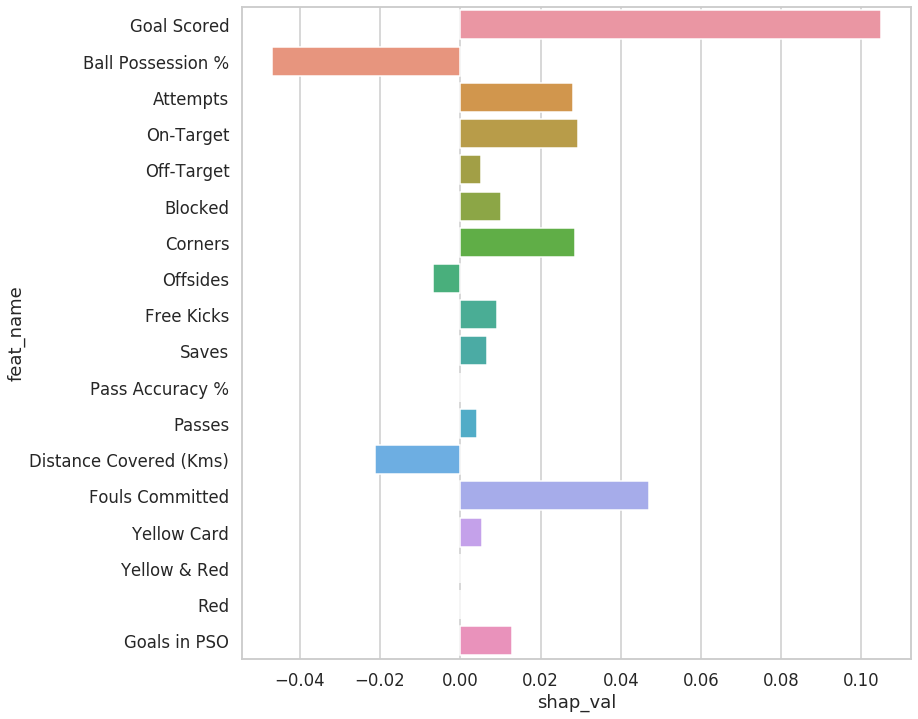

In [ ]:
# let's plot the Shap values
sns.set(context='talk', style="whitegrid", rc={'figure.figsize':[12,12]})
sns.barplot(x='shap_val', y='feat_name', data=expl)
plt.show()

In [ ]:
# A nice representation is provided by force plots

# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer.expected_value[1], shap_val[1], fifa_val_X.iloc[pred_to_explain,:] )

## Example: Bike Rental (Regression)

In [ ]:
explainer = shap.KernelExplainer(bike_forest_model.predict, shap.kmeans(bike_train_X,2))


shap_val=explainer.shap_values(bike_val_X.iloc[pred_to_explain,:])
expl = pd.DataFrame({'feat_name': bike_train_X.columns.values, 'feat_val': bike_val_X.iloc[pred_to_explain,:], 'shap_val':  shap_val})
expl

feat_name   feat_val     shap_val
season          season   3.000000    13.332448
mnth              mnth   9.000000    77.722881
holiday        holiday   0.000000     0.000000
weekday        weekday   3.000000     0.000000
workingday  workingday   1.000000     0.000000
weathersit  weathersit   3.000000  -388.677906
temp              temp  20.160849   319.784500
atemp            atemp   0.544229   126.425267
hum                hum  91.708300 -2316.153457
windspeed    windspeed   6.500394   409.940720

In [ ]:
# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_val, bike_val_X.iloc[pred_to_explain,:] )

In [ ]:
# We can also explain all the predictions

all_shap_val = explainer.shap_values(bike_val_X)

  0%|          | 0/183 [00:00<?, ?it/s]

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# Now we can show force plot for the whole dataset
shap.force_plot(explainer.expected_value, all_shap_val, bike_val_X)

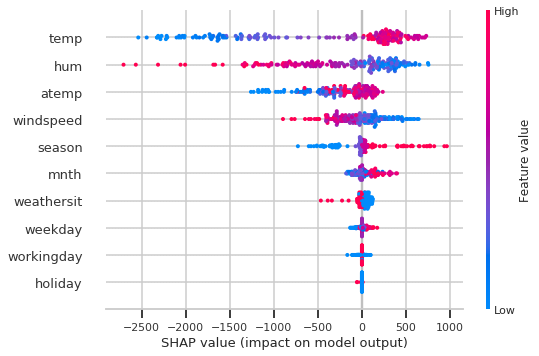

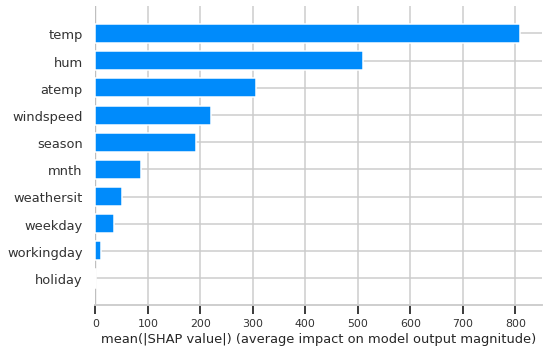

In [ ]:
# We can also have a sumary plot of the shap values
shap.summary_plot(all_shap_val, bike_val_X)
shap.summary_plot(all_shap_val, bike_val_X, plot_type="bar")

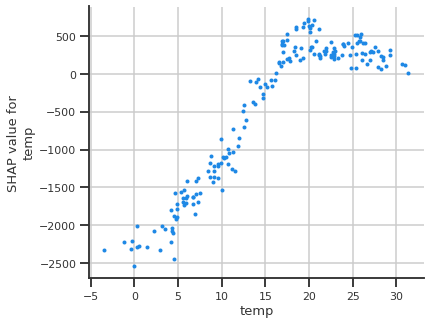

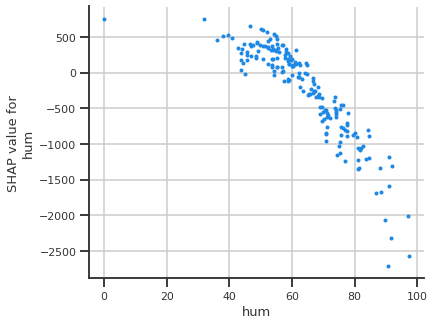

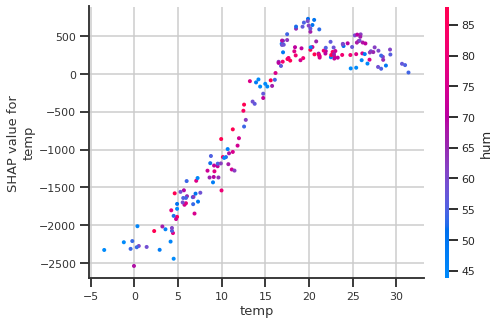

In [ ]:
# We can also get a dependency plot

shap.dependence_plot('temp', all_shap_val, bike_val_X, interaction_index=None)
shap.dependence_plot('hum', all_shap_val, bike_val_X, interaction_index=None)
shap.dependence_plot('temp', all_shap_val, bike_val_X, interaction_index='hum')

### Final remarks on Shapley Values
Pros
* solid theoretical framework
* nice properties (additivity, contributions fairly distributed)
* allow constrastive explanations using a subset of data to compute the values

Cons
* computationally expensive
* no simple (sparse) explanations are possible

## Local Surrogate (LIME)

The recipe for training local surrogate models:

* Select your instance of interest for which you want to have an explanation of its black box prediction.
* Perturb your dataset and get the black box predictions for these new points.
* Weight the new samples according to their proximity to the instance of interest.
* Train a weighted, interpretable model on the dataset with the variations.
* Explain the prediction by interpreting the local model.

![](https://raw.githubusercontent.com/DanieleLoiacono/DMTM2019-Notebooks/master/explainability/images/lime.png)


### Example: Man of the Match (Classification)

We will use the [Lime library](https://github.com/marcotcr/lime) and in particular [lime.tabular](https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular)

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(fifa_train_X.values, feature_names=fifa_feature_names, 
                                                   class_names=['No', 'Yes'], discretize_continuous=True, 
                                                   verbose=True)

In [ ]:
i = 1
exp = explainer.explain_instance(fifa_val_X.iloc[i].values, rf_model.predict_proba, num_features=4)
exp.show_in_notebook(show_table=True, show_all=True)

Intercept 0.4137778695283782
Prediction_local [0.67877851]
Right: 0.61


In [ ]:
exp.as_list()

[('1.00 < Goal Scored <= 2.00', 0.10779877968110313),
 ('On-Target > 5.00', 0.07552015353345204),
 ('Corners > 6.00', 0.04523155684403204),
 ('Free Kicks > 18.00', 0.03645014758221182)]

### Example: Bike Rental (Regression)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(bike_train_X.values, feature_names=bike_features, 
                                                   class_names=['count'], mode='regression', 
                                                   discretize_continuous=True, verbose=True)

In [ ]:
i = 1
exp = explainer.explain_instance(bike_val_X.iloc[i].values, bike_forest_model.predict, num_features=5)
exp.show_in_notebook(show_table=True, show_all=True)

Intercept 4039.510886987878
Prediction_local [5873.32709032]
Right: 5471.3


In [ ]:
exp.as_list()

[('temp > 22.79', 1123.3446368664268),
 ('windspeed <= 9.16', 360.37621372728245),
 ('atemp > 0.61', 356.6546464754982),
 ('63.08 < hum <= 72.96', -48.91744446269779),
 ('weathersit <= 1.00', 42.35815072974716)]

## Glassbox Models - Explainable Boosting Machine

Explainable Boosting Machine (EBM) is a tree-based, cyclic gradient boosting Generalized Additive Model with automatic interaction detection. EBMs are often as accurate as state-of-the-art blackbox models while remaining completely interpretable

![](https://blog.oakbits.com/images/039/perf_vs_xplain.png)

EBM explainable. EBM is a type of Generalized Additive Model (GAM):

![](https://blog.oakbits.com/images/039/math_gam.png)

The EBM training part uses a combination of boosted trees and bagging. 
Shallow trees are trained in a boosted way. These are tiny trees (with a maximum of 3 leaves by default). Also, the boosting process is specific: Each tree is trained on only one feature. During each boosting round, trees are trained for each feature one after another. 

As a result: 
* the model is additive.
* each shape function uses only one feature.

![](https://blog.oakbits.com/images/039/training.png)

## References

* [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/)
* [Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)
* [Explainable Boosting Machine](https://arxiv.org/pdf/1909.09223.pdf)
* [A guide to 7 Packages in Python to Explain Your Models](https://medium.com/towards-data-science/explainable-ai-xai-a-guide-to-7-packages-in-python-to-explain-your-models-932967f0634b)